In [247]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import xgboost as xgb
from sklearn.metrics import accuracy_score
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
df = pd.read_csv("./Housing.csv")

In [248]:
df.isna().sum().sum()

np.int64(0)

In [249]:
df1=df.copy()

In [250]:
df1

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished


In [251]:
df1=df[['area','bathrooms','price']]

In [252]:
df3=df1.copy()

In [253]:
df3

,area,bathrooms,price
0,7420,2,13300000
1,8960,4,12250000
2,9960,2,12250000
3,7500,2,12215000
4,7420,1,11410000
...,...,...,...
540,3000,1,1820000
541,2400,1,1767150
542,3620,1,1750000
543,2910,1,1750000


In [254]:
df.select_dtypes(exclude="number")

,mainroad,guestroom,basement,hotwaterheating,airconditioning,prefarea,furnishingstatus
0,yes,no,no,no,yes,yes,furnished
1,yes,no,no,no,yes,no,furnished
2,yes,no,yes,no,no,yes,semi-furnished
3,yes,no,yes,no,yes,yes,furnished
4,yes,yes,yes,no,yes,no,furnished
...,...,...,...,...,...,...,...
540,yes,no,yes,no,no,no,unfurnished
541,no,no,no,no,no,no,semi-furnished
542,yes,no,no,no,no,no,unfurnished
543,no,no,no,no,no,no,furnished


In [255]:
from sklearn.preprocessing import LabelEncoder


categorical_features = df.select_dtypes(exclude="number").columns.to_list()
for feature in categorical_features:
    le = LabelEncoder()
    
    df[feature] = le.fit_transform(df[feature])

# df['price'] = le.fit_transform(df['price'])

Chisquare test> 200 hoa valo...

In [256]:
df

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,0
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,0
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,1
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,0
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,1,0,1,0,0,2,0,2
541,1767150,2400,3,1,1,0,0,0,0,0,0,0,1
542,1750000,3620,2,1,1,1,0,0,0,0,0,0,2
543,1750000,2910,3,1,1,0,0,0,0,0,0,0,0


In [257]:
from sklearn.feature_selection import chi2, SelectKBest

X = df[categorical_features]
y = df['price']

selector = SelectKBest(score_func=chi2, k=6)
X_new = selector.fit_transform(X, y)

feature_scores = selector.scores_
selected_features = X.columns[selector.get_support()]

print("Feature Scores:", feature_scores)
print("Selected Features:", selected_features)

Feature Scores: [ 34.40870472 248.49717    171.88847153 224.40441643 198.95647542
 223.94855494 149.06407323]
Selected Features: Index(['guestroom', 'basement', 'hotwaterheating', 'airconditioning',
       'prefarea', 'furnishingstatus'],
      dtype='object')


In [258]:
df_new = df[['guestroom', 'basement', 'hotwaterheating', 'airconditioning',
       'prefarea', 'furnishingstatus']]

In [259]:
df_new

,guestroom,basement,hotwaterheating,airconditioning,prefarea,furnishingstatus
0,0,0,0,1,1,0
1,0,0,0,1,0,0
2,0,1,0,0,1,1
3,0,1,0,1,1,0
4,1,1,0,1,0,0
...,...,...,...,...,...,...
540,0,1,0,0,0,2
541,0,0,0,0,0,1
542,0,0,0,0,0,2
543,0,0,0,0,0,0


               area  bathrooms     price
area       1.000000   0.193820  0.535997
bathrooms  0.193820   1.000000  0.517545
price      0.535997   0.517545  1.000000


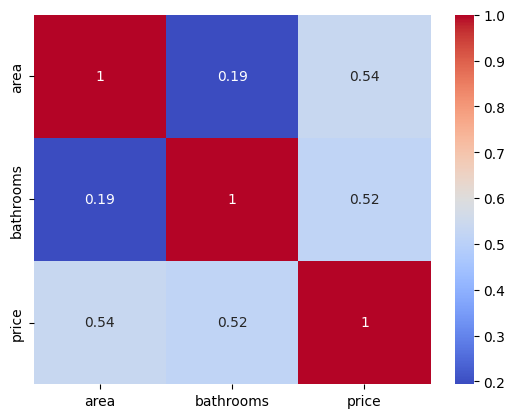

In [260]:
co_mtx = df1.corr(numeric_only=True)

# Print correlation matrix
print(co_mtx)

# Plot correlation heatmap
sns.heatmap(co_mtx, cmap="coolwarm", annot=True)

# Display heatmap
plt.show()

In [261]:
cor1 = df1.corr(numeric_only=True)
#Correlation with output variable
cor_target = abs(cor1["price"])
#Selecting highly correlated features
relevant_features = cor_target[cor_target>0.5]
relevant_features

area         0.535997
bathrooms    0.517545
price        1.000000
Name: price, dtype: float64

In [262]:
df = pd.concat([df_new, df3], axis=1) 

In [263]:
df

,guestroom,basement,hotwaterheating,airconditioning,prefarea,furnishingstatus,area,bathrooms,price
0,0,0,0,1,1,0,7420,2,13300000
1,0,0,0,1,0,0,8960,4,12250000
2,0,1,0,0,1,1,9960,2,12250000
3,0,1,0,1,1,0,7500,2,12215000
4,1,1,0,1,0,0,7420,1,11410000
...,...,...,...,...,...,...,...,...,...
540,0,1,0,0,0,2,3000,1,1820000
541,0,0,0,0,0,1,2400,1,1767150
542,0,0,0,0,0,2,3620,1,1750000
543,0,0,0,0,0,0,2910,1,1750000


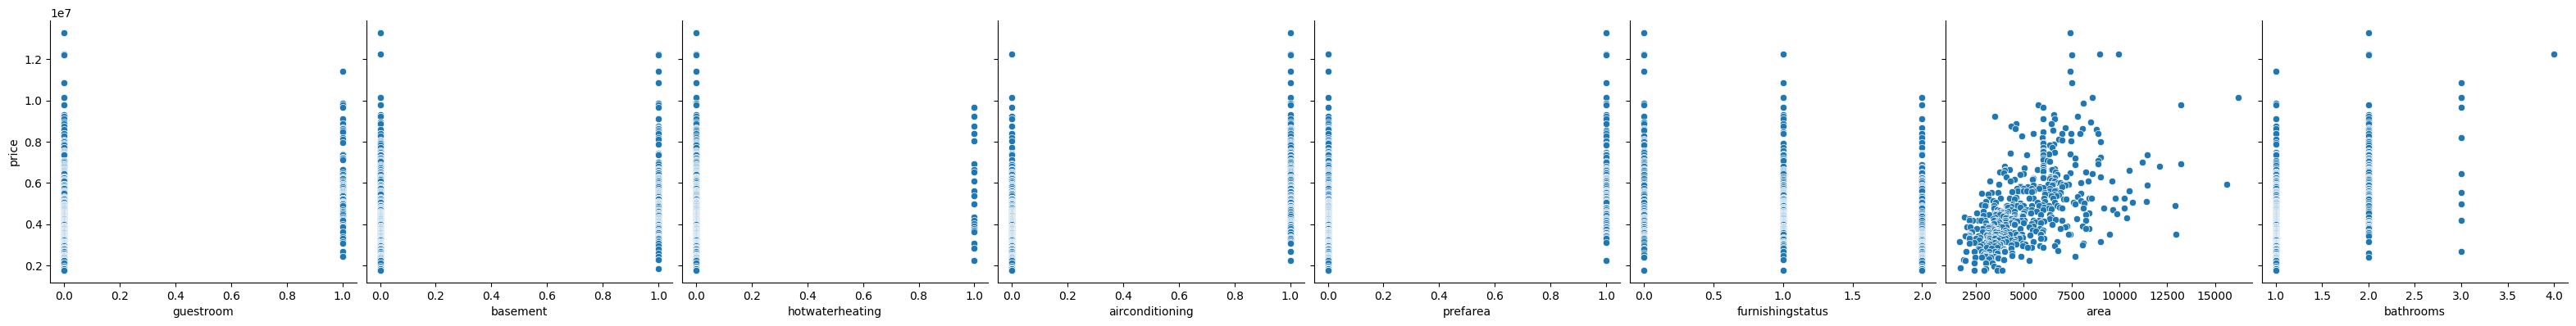

In [264]:
import seaborn as sns

sns.pairplot(df, x_vars=df.drop('price', axis=1).columns, y_vars='price', height=4, kind='scatter')
plt.show()

In [265]:
from sklearn.preprocessing import MinMaxScaler
# data = df[['area','bathrooms']]
scaler = MinMaxScaler()
df[['area','bathrooms']]=scaler.fit_transform(df[['area','bathrooms']])

In [266]:
df

,guestroom,basement,hotwaterheating,airconditioning,prefarea,furnishingstatus,area,bathrooms,price
0,0,0,0,1,1,0,0.396564,0.333333,13300000
1,0,0,0,1,0,0,0.502405,1.000000,12250000
2,0,1,0,0,1,1,0.571134,0.333333,12250000
3,0,1,0,1,1,0,0.402062,0.333333,12215000
4,1,1,0,1,0,0,0.396564,0.000000,11410000
...,...,...,...,...,...,...,...,...,...
540,0,1,0,0,0,2,0.092784,0.000000,1820000
541,0,0,0,0,0,1,0.051546,0.000000,1767150
542,0,0,0,0,0,2,0.135395,0.000000,1750000
543,0,0,0,0,0,0,0.086598,0.000000,1750000


Outlier removing....

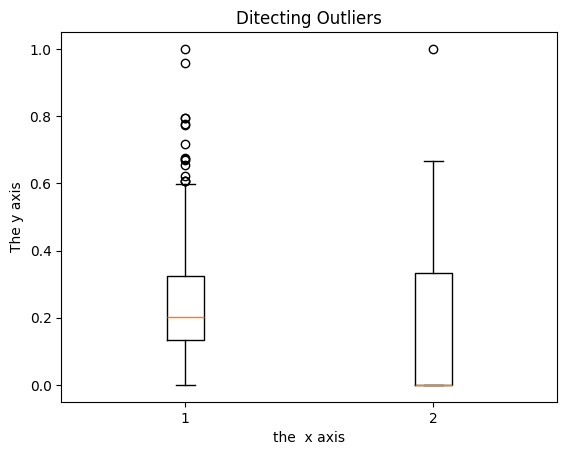

In [267]:
import matplotlib.pyplot as plt

# Data for monthly sales
product_A_sales = df['area']
product_B_sales = df['bathrooms']


# Introducing outliers 
# product_A_sales.extend([300, 80])
# product_B_sales.extend([50, 300])


# Creating a box plot with outliers
plt.boxplot([product_A_sales, product_B_sales], sym='o')
plt.title('Ditecting Outliers')
plt.xlabel('the  x axis')
plt.ylabel('The y axis')
plt.show()

In [268]:

df=df[df['area'] <= 0.6]
df=df[df['bathrooms'] <= 0.8]



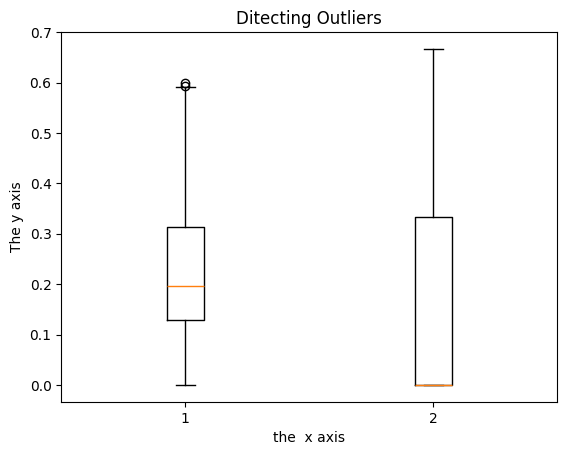

In [269]:
product_A_sales = df['area']
product_B_sales = df['bathrooms']


# Introducing outliers 
# product_A_sales.extend([300, 80])
# product_B_sales.extend([50, 300])


# Creating a box plot with outliers
plt.boxplot([product_A_sales, product_B_sales], sym='o')
plt.title('Ditecting Outliers')
plt.xlabel('the  x axis')
plt.ylabel('The y axis')
plt.show()

In [270]:
X=df.drop('price',axis=1)
y=df['price']

In [271]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33, random_state=42)

In [272]:
reg = LinearRegression()
reg.fit(X_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [273]:
# regression coefficients
print('Coefficients: ', reg.coef_)

# variance score: 1 means perfect prediction
print('Variance score: {}'.format(reg.score(X_test, y_test)))

Coefficients:  [ 554640.40576314   59840.15166285  350420.39936626 1049864.65739468
  616027.68086067 -308176.1081031  4666969.34199357 3540967.10589231]
Variance score: 0.563643502520408


2)XGboost

In [274]:
import xgboost as xgb

In [275]:

xgb_test = xgb.DMatrix(X_test, y_test, enable_categorical=True)
xgb_train = xgb.DMatrix(X_train, y_train, enable_categorical=True)

In [276]:
params = {
    'objective': 'reg:squarederror',
    'max_depth': 4,
    'learning_rate': 0.05,
    'subsample': 0.8,
    'colsample_bytree': 0.8,
    'eval_metric': 'rmse'
}
n=300
model = xgb.train(params=params,dtrain=xgb_train,num_boost_round=n)

In [277]:
preds = model.predict(xgb_test)
r2 = r2_score(y_test, preds)
rmse = np.sqrt(mean_squared_error(y_test, preds))
mae = mean_absolute_error(y_test, preds)

print("R² Score:", r2)
print("RMSE:", rmse)
print("MAE:", mae)

R² Score: 0.6080862283706665
RMSE: 1295828.0008334438
MAE: 968789.0
